# By Akash Jagdale - DATA SCIENCE AND BUSINESS ANALYTICS INTERN
Task 1 : Prediction Using Supervised Machine Learning

Problem Statement : Predict the percentage of an student based on the no. of study hours

Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings as wg


In [2]:
#To read data
url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
data = pd.read_csv(url)
print("Successfully data imported")

data.head()

Successfully data imported


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [3]:
data.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [4]:
print(data.shape)

(25, 2)


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [7]:
 #looking for missing values
data.isnull().sum()

Hours     0
Scores    0
dtype: int64

Check the correlation

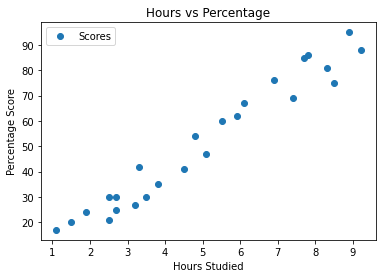

In [8]:
data.plot(x='Hours' , y='Scores' , style='o')
plt.title('Hours vs Percentage')
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.show()

In [9]:
data.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


Linear Regression

In [12]:
x = data.iloc[:,:-1].values
y = data.iloc[:, 1].values
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [13]:
y

array([21, 47, 27, 75, 30, 20, 88, 60, 81, 25, 85, 62, 41, 42, 17, 95, 30,
       24, 67, 69, 30, 54, 35, 76, 86], dtype=int64)

Splitting the dataset

In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train , y_test = train_test_split(x,y,test_size=0.2, random_state=0)

Training the algorithm


In [16]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)
print("Training complete")

Training complete


Plotting train,test and predicted scores

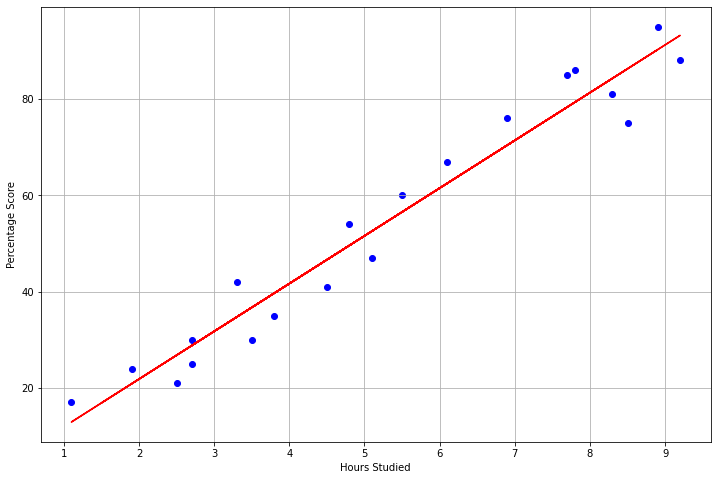

In [20]:
line = (model.coef_)*x + model.intercept_ #y=mx+c
plt.figure(figsize = (12,8))
plt.scatter(x_train, y_train,color='blue')
plt.plot(x, line, color="red")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

Plotting for the testing data


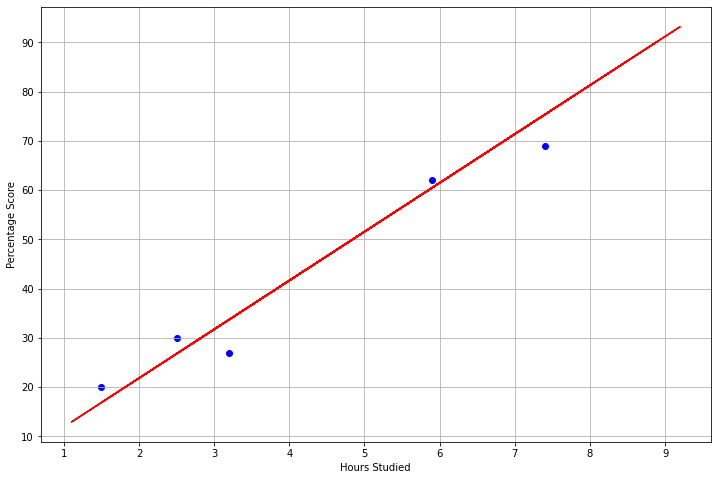

In [22]:
plt.figure(figsize = (12,8))
plt.scatter(x_test, y_test,color='blue')
plt.plot(x,line, color="red")
plt.xlabel('Hours Studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

Model to make predictions

In [24]:
y_pred = model.predict(x_test)
df= pd.DataFrame({'Actual Scores': y_test, 'Predicted Score':y_pred})
df

,Actual Scores,Predicted Score
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [26]:
#Testing with available own data
hours = 9.25
data_pred = model.predict([[hours]])
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(data_pred[0]))
print("The predicted score if a student studies for",hours,"hours is",data_pred[0])

No of Hours = 9.25
Predicted Score = 93.69173248737538
The predicted score if a student studies for 9.25 hours is 93.69173248737538


 Evaluating the model

In [27]:
from sklearn import metrics
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test, y_pred))

Mean Absolute Error: 4.183859899002975
